<a href="https://colab.research.google.com/github/Luceliafn/PythonFundamentos/blob/master/NER_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch-crf
!pip install seqeval

     |████████████████████████████████| 43 kB 2.0 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=3f6a1bba94e9cd4cd7cc0ca9b545f6a960e88f1a2b0e6142eda96b89156e2c10
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


# Aula de Reconhecimento de Entidades Nomeadas utilizando deep learning

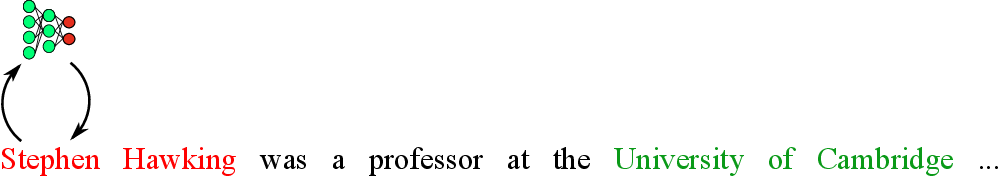

In [ ]:
dataset = 'nomeacao_comissionado' # Opcoes: 'aposentadoria' ou 'nomeacao_comissionado'

if dataset == 'aposentadoria':
    ## Download do dataset de aposentadoria
    # Download conjunto de treinamento
    !gdown --id 1HUdYvPrg-nA1sEUBMBFsIdTlnNoM9fCu
    # Download conjunto de validacao
    !gdown --id 12VCOinAkxH-2BvY3JzclwoYMHD_HrGMq
    # Download conjunto de teste
    !gdown --id 15ZRzmkk1Y70R8tVlmM1qKNzZYLIX5LXj
else:
    ## Download do dataset de nomeacao comissionado
    # Download conjunto de treinamento
    !gdown --id 18HZgSU6mdoDRUj8iuqBd8jKthoUdNbp0
    # Download conjunto de validacao
    !gdown --id 1t6nJInf8WBGUMWKeNaSOojJN9jH4wrVX
    # Download conjunto de teste
    !gdown --id 1N88b6KVu9L0mZhPz8on7NDyLyBMQmiaK

Downloading...
From: https://drive.google.com/uc?id=18HZgSU6mdoDRUj8iuqBd8jKthoUdNbp0
To: /content/nomeacao_comissionado_train.txt
100% 598k/598k [00:00<00:00, 38.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t6nJInf8WBGUMWKeNaSOojJN9jH4wrVX
To: /content/nomeacao_comissionado_testa.txt
100% 125k/125k [00:00<00:00, 19.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N88b6KVu9L0mZhPz8on7NDyLyBMQmiaK
To: /content/nomeacao_comissionado_testb.txt
100% 121k/121k [00:00<00:00, 44.6MB/s]


# Dados de aposentadoria padrão CoNLL

In [ ]:
train_path = '/content/' + dataset + '_train.txt'
f = open(train_path, 'r').read().splitlines()
f[:20]

['CONCEDER X X B-ATO',
 'aposentadoria X X I-ATO',
 'voluntaria X X O',
 'ao X X O',
 'servidor X X O',
 'MANOEL X X B-NOME_ATO',
 'FRANCISCO X X I-NOME_ATO',
 'DOS X X I-NOME_ATO',
 'SANTOS X X I-NOME_ATO',
 'matricula X X O',
 'no X X O',
 '000.000-X X X B-COD_MATRICULA_ATO',
 'Tecnico X X B-CARGO',
 'Socioeducativo X X I-CARGO',
 '- X X I-CARGO',
 'Classe X X B-CLASSE',
 'Especial X X I-CLASSE',
 'Padrao X X B-PADRAO',
 'V X X I-PADRAO',
 'fundamentada X X B-FUND_LEGAL']

# Pré-processamento dos dados

* Passo 1: Separar as palavras e as classes
* Passo 2: Criar dicionarios de palavras e classes (utilizados para treinar o modelo neural)
* Passo 3: Substituir as palavras pelo seu indice no dicionario criado
* Passo 4: Adicionar tokens de inicio e final de sentenca
* Passo 5: Criar os mini-batches de treinamento

### Passo 1: Separando as palavras e as classes

In [ ]:
def preprocess(ner_set):
    sentences = []
    tags = []

    temp_sentence = []
    temp_tag = []
    for line in ner_set:
        try:
            word, _, _, tag = line.split()
            temp_sentence.append(word)
            temp_tag.append(tag)
        except:
            sentences.append(temp_sentence)
            tags.append(temp_tag)
            temp_sentence = []
            temp_tag = []

    if temp_sentence:
        sentences.append(temp_sentence)
        tags.append(temp_tag)
    return sentences, tags

In [ ]:
train_x, train_y = preprocess(open('/content/' + dataset + '_train.txt', 'r'))
valid_x, valid_y = preprocess(open('/content/' + dataset + '_testa.txt', 'r'))
test_x, test_y = preprocess(open('/content/' + dataset + '_testb.txt', 'r'))

In [ ]:
print(' '.join(train_x[0]))
print()
print(' '.join(train_y[0]))

CONCEDER aposentadoria voluntaria ao servidor MANOEL FRANCISCO DOS SANTOS matricula no 000.000-X Tecnico Socioeducativo - Classe Especial Padrao V fundamentada nos termos do artigo 0o incisos I II III e paragrafo unico da Emenda Constitucional no 00/0000 combinado com o artigo 00 da Lei Complementar no 000/0000 com as vantagens do artigo 0o da Lei no 0.000/00 Processo SEI no 00000-00000000/0000-00

B-ATO I-ATO O O O B-NOME_ATO I-NOME_ATO I-NOME_ATO I-NOME_ATO O O B-COD_MATRICULA_ATO B-CARGO I-CARGO I-CARGO B-CLASSE I-CLASSE B-PADRAO I-PADRAO B-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEGAL I-FUND_LEG

### Passo 2: Criando os dicionários de palavras e classes (utilizando o conjunto de treinamento)

Incluindo os tokens especiais \<UNK\>, \<BOS\>, \<EOS\> de palavras e \<PAD\> para classes

In [ ]:
from collections import OrderedDict

def word_dict(sentences):
    word2idx = OrderedDict({'<UNK>': 0, '<PAD>': 1, '<BOS>': 2, '<EOS>': 3})
    for sentence in sentences:
        for word in sentence:
            if word not in word2idx:
                word2idx[word] = len(word2idx)
    return word2idx

def tag_dict(tag_sentences):
    tag2idx = OrderedDict({'<PAD>': 0})
    for tags in tag_sentences:
        for tag in tags:
            if tag not in tag2idx:
                tag2idx[tag] = len(tag2idx)
    return tag2idx

word2idx = word_dict(train_x)
tag2idx  = tag_dict(train_y)

In [ ]:
tag2idx

OrderedDict([('<PAD>', 0),
             ('B-ATO', 1),
             ('I-ATO', 2),
             ('O', 3),
             ('B-NOME_ATO', 4),
             ('I-NOME_ATO', 5),
             ('B-COD_MATRICULA_ATO', 6),
             ('B-CARGO', 7),
             ('I-CARGO', 8),
             ('B-CLASSE', 9),
             ('I-CLASSE', 10),
             ('B-PADRAO', 11),
             ('I-PADRAO', 12),
             ('B-FUND_LEGAL', 13),
             ('I-FUND_LEGAL', 14),
             ('B-PROCESSO', 15),
             ('B-QUADRO', 16),
             ('I-QUADRO', 17),
             ('B-EMPRESA_ATO', 18),
             ('I-EMPRESA_ATO', 19),
             ('I-PROCESSO', 20),
             ('I-COD_MATRICULA_ATO', 21)])

In [ ]:
for idx, word in enumerate(word2idx):
    print(word, word2idx[word])
    if idx >= 20:
        break

<UNK> 0
<PAD> 1
<BOS> 2
<EOS> 3
CONCEDER 4
aposentadoria 5
voluntaria 6
ao 7
servidor 8
MANOEL 9
FRANCISCO 10
DOS 11
SANTOS 12
matricula 13
no 14
000.000-X 15
Tecnico 16
Socioeducativo 17
- 18
Classe 19
Especial 20


### Passo 3: Substituir as palavras e classes pelos seus indices nos dicionarios criados

In [ ]:
def numericalize(sentences, word2idx, tag_sentences, tag2idx):
    numericalized_sentences = [[word2idx['<UNK>'] if word not in word2idx else word2idx[word] for word in sentence] for sentence in sentences]
    numericalized_tags = [[tag2idx[tag] for tag in tags] for tags in tag_sentences]
    return numericalized_sentences, numericalized_tags

train_x, train_y = numericalize(train_x, word2idx, train_y, tag2idx)
valid_x, valid_y = numericalize(valid_x, word2idx, valid_y, tag2idx)
test_x, test_y = numericalize(test_x, word2idx, test_y, tag2idx)

train_x[0]

### Passo 4: Adicionar tokens de inicio e final de sentenca

In [ ]:
import itertools
import torch
def add_special_tokens(sentences, word2idx, tag_sentences, tag2idx):
    formatted_sentences = [torch.LongTensor([word for word in itertools.chain([word2idx['<BOS>']], sentence, [word2idx['<EOS>']])]) for sentence in sentences]
    formatted_tags = [torch.LongTensor([tag for tag in itertools.chain([tag2idx['O']], tags, [tag2idx['O']])]) for tags in tag_sentences]
    return formatted_sentences, formatted_tags

train_x, train_y = add_special_tokens(train_x, word2idx, train_y, tag2idx)
valid_x, valid_y = add_special_tokens(valid_x, word2idx, valid_y, tag2idx)
test_x, test_y   = add_special_tokens(test_x, word2idx, test_y, tag2idx)

train_x[0]

tensor([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        14, 39, 40, 41, 42, 27, 43, 36, 44, 45, 14, 46, 41, 47, 48, 26, 27, 28,
        36, 44, 14, 49, 50, 51, 14, 52,  3])

### Passo 5: Criar os mini-batches de treinamento

In [ ]:
len(train_x), max([len(ato) for ato in train_x])

(3860, 498)

In [ ]:
import numpy as np

# Ordenando sentencas por tamanho (antes de criar os batches)
ordered_idx = np.argsort([len(train_x[i]) for i in range(len(train_x))])
train_x = [train_x[idx] for idx in ordered_idx]
train_y = [train_y[idx] for idx in ordered_idx]

In [ ]:
from torch.nn.utils.rnn import pad_sequence

def create_batches(x, y, batch_size, pad_token, pad_class):
    batch_x = []
    batch_y = []
    mask = []

    # Separando os batches pelo tamanho de batch_size
    i = 0
    while i < len(x):
        batch_x.append(x[i:min(len(x), i+batch_size)])
        batch_y.append(y[i:min(len(y), i+batch_size)])
        i += batch_size
    
    # Realizando padding dos batches e criando mask para identificar padding durante o treinamento
    for i in range(len(batch_x)):
        batch_x[i] = pad_sequence(batch_x[i], batch_first = True, padding_value = pad_token)
        batch_y[i] = pad_sequence(batch_y[i], batch_first = True, padding_value = pad_class)
        mask.append(batch_x[i] != pad_token)

    return batch_x, batch_y, mask

train_x, train_y, mask = create_batches(train_x, train_y, batch_size=32, pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])
valid_x, _, valid_mask = create_batches(valid_x, valid_y, batch_size=len(valid_x), pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])
test_x, _, test_mask   = create_batches(test_x,  test_y,  batch_size=len(test_x),  pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])

In [ ]:
train_x[0].shape, train_y[0].shape, mask[0].shape

(torch.Size([32, 54]), torch.Size([32, 54]), torch.Size([32, 54]))

In [ ]:
train_x[0][0, :mask[0][0].sum()]

tensor([   2,    4,    5,   53,   80,  499,   56,  607, 1425,   13,   14,   84,
          14,  773,   42,  753,   62,  328,   62,  754,   19,   20,   36,  669,
          62,  754,  755,   26,   68,   69,   24,   25,   26,   27,   28,   36,
          37,   38,   14,   39,    3])

# Criando o modelo neural biLSTM-CRF

O modelo consiste em:



1.   Camada de embeddings (transforma indices das palavras em vetores numericos)
2.   Camada biLSTM para encode da informação (-> <-)
3.   Camada linear para reducao da dimensao do vetor de saida da camada biLSTM
3.   Camada CRF para classificação de cada token de entrada



In [ ]:
from torchcrf import CRF

In [ ]:
class bilstm_crf(torch.nn.Module):
    def __init__(self, word2idx, tag2idx):
        super(bilstm_crf, self).__init__()
        # Camada de embeddings
        self.embedding = torch.nn.Embedding(num_embeddings=len(word2idx), embedding_dim = 50, padding_idx = word2idx['<PAD>'])
        # Camada biLSTM
        self.bilstm = torch.nn.LSTM(input_size=50, hidden_size = 200, num_layers = 2, batch_first = True, bidirectional = True, dropout = 0.25)
        # Camada linear
        self.linear = torch.nn.Linear(400, len(tag2idx))
        # Camada CRF
        self.crf = CRF(num_tags = len(tag2idx), batch_first = True)

    def forward(self, x, y, mask):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.linear(x)
        loss = self.crf(x, y, mask=mask)
        return loss

    def decode(self, x, mask):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.linear(x)
        prediction = self.crf.decode(x, mask=mask)
        return prediction
    

In [ ]:
model = bilstm_crf(word2idx = word2idx, tag2idx = tag2idx)
loss = model(train_x[0], train_y[0], mask[0])
prediction = model.decode(valid_x[0], valid_mask[0])

loss

tensor(-5124.3311, grad_fn=<SumBackward0>)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

cuda


# Código para avaliação do modelo

Métrica span-based f1-score (f1-score a nível de entidades)

$f_1 = 2\frac{precision\times recall}{precision + recall}$

$precision = \frac{TP}{TP + FP}$

$recall = \frac{TP}{TP + FN}$

In [ ]:
from seqeval.metrics import f1_score
from seqeval.scheme import IOB1

In [ ]:
idx2tag = {idx: tag for tag, idx in tag2idx.items()}

def IOBify(tags_sequence, idx2tag):
    if isinstance(tags_sequence[0], list):
        iob_y = [[idx2tag[tag] for tag in tags] for tags in tags_sequence]
    else:
        iob_y = [[idx2tag[tag.item()] for tag in tags] for tags in tags_sequence]
    return iob_y

y_true = IOBify(valid_y, idx2tag)
y_pred = IOBify(prediction, idx2tag)

In [ ]:
f1_score(y_true, y_pred)

0.02055514263013558

# Código para treinamento do modelo

In [ ]:
if dataset == 'aposentadoria':
    lrate = 0.0015
else:
    lrate = 0.01
optim = torch.optim.SGD(model.parameters(), lr=lrate, momentum=0.9)

In [ ]:
f1_history = []
mean_loss_history = []

# Alterar numero de epocas de treinamento (~30-50 epocas para modelo bem treinado)
for epoch in range(2):
    mean_loss = 0.0
    model.train()
    # Iniciando uma epoch de treinamento supervisionado
    for batch in range(len(train_x)):
        x = train_x[batch].to(device)
        y = train_y[batch].to(device)
        m = mask[batch].to(device)
        optim.zero_grad()
        loss = -model(x, y, m)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
        optim.step()
        mean_loss += loss
    mean_loss /= len(train_x)
    mean_loss_history.append(mean_loss)

    model.eval()
    # Calculo do desempenho do modelo treinado nesta epoch
    y_pred = model.decode(valid_x[0].to(device), valid_mask[0].to(device))
    y_pred = IOBify(y_pred, idx2tag)
    y_true = IOBify(valid_y, idx2tag)
    f1 = f1_score(y_true, y_pred)
    f1_history.append(f1)

    print(f'Epoch: {epoch} | Loss media: {mean_loss} | f1-score: {f1}')



Epoch: 0 | Loss media: 4072.568603515625 | f1-score: 0.008746355685131194
Epoch: 1 | Loss media: 1828.18017578125 | f1-score: 0.21584797418429547
Epoch: 2 | Loss media: 881.9417724609375 | f1-score: 0.6730172476004906


[Text(0, 0.5, 'mean loss'), Text(0.5, 0, 'epochs')]

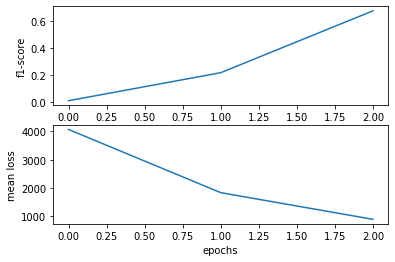

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(f1_history)
axs[1].plot(mean_loss_history)
axs[0].set(ylabel='f1-score')
axs[1].set(xlabel='epochs', ylabel='mean loss')

# Utilização do modelo treinado para predição em novos dados e interface com usuário

Passos:


1.   Transformar as palavras do texto em indices utilizando o dicionario word2idx e converter para tensor
2.   Realizar as predições
3.   Realizar extração das entidades de acordo com as predições



In [ ]:
# Baixando e Carregando modelo ja treinado (comentar esta celula caso queira utilizar o modelo treinado nas celulas anteriores)
if dataset == 'aposentadoria':
    !gdown --id 1-dLZAt2yYUc8oPUffP_USVIXJFaimP3G
    !tar -xvzf model.tar.gz
    model.load_state_dict(torch.load('/content/model/ner_class.pt'))
else:
    !gdown --id 1t-2xJ3hGzIO0ecfBk6LOawOXunOoJ0C_
    model.load_state_dict(torch.load('/content/nomeacao_model.pt'))

Downloading...
From: https://drive.google.com/uc?id=1-dLZAt2yYUc8oPUffP_USVIXJFaimP3G
To: /content/model.tar.gz
5.87MB [00:00, 27.3MB/s]
model/
model/ner_class.pt


### Passo 1: Transformar as palavras em indices utilizando word2idx

In [ ]:
text = '<BOS> CONCEDER aposentadoria voluntaria integral ao servidor SILONI SOARES DA SILVA matricula n.o 00.000-0 no cargo de Auditor-Fiscal da Receita do Distrito Federal Classe Especial Padrao III do Quadro de Pessoal do Distrito Federal nos termos do artigo 0o incisos I II e III e Paragrafo unico da Emenda Constitucional n.o 00 de 00/00/0000 combinado com o artigo 00 da Lei Complementar n.o 000 de 00/00/0000 com a vantagem pessoal prevista no artigo 0o da Lei no 0.000 de 00/00/0000 Secretaria de Estado de Fazenda Planejamento Orcamento e Gestao do Distrito Federal Processo SEI n.o 00000- 00000000/0000-00 <EOS>'.split()
print(' '.join(text))

<BOS> CONCEDER aposentadoria voluntaria integral ao servidor SILONI SOARES DA SILVA matricula n.o 00.000-0 no cargo de Auditor-Fiscal da Receita do Distrito Federal Classe Especial Padrao III do Quadro de Pessoal do Distrito Federal nos termos do artigo 0o incisos I II e III e Paragrafo unico da Emenda Constitucional n.o 00 de 00/00/0000 combinado com o artigo 00 da Lei Complementar n.o 000 de 00/00/0000 com a vantagem pessoal prevista no artigo 0o da Lei no 0.000 de 00/00/0000 Secretaria de Estado de Fazenda Planejamento Orcamento e Gestao do Distrito Federal Processo SEI n.o 00000- 00000000/0000-00 <EOS>


In [ ]:
if dataset == 'aposentadoria':
    text = '<BOS> CONCEDER aposentadoria voluntaria integral ao servidor SILONI SOARES DA SILVA matricula n.o 00.000-0 no cargo de Auditor-Fiscal da Receita do Distrito Federal Classe Especial Padrao III do Quadro de Pessoal do Distrito Federal nos termos do artigo 0o incisos I II e III e Paragrafo unico da Emenda Constitucional n.o 00 de 00/00/0000 combinado com o artigo 00 da Lei Complementar n.o 000 de 00/00/0000 com a vantagem pessoal prevista no artigo 0o da Lei no 0.000 de 00/00/0000 Secretaria de Estado de Fazenda Planejamento Orcamento e Gestao do Distrito Federal Processo SEI n.o 00000- 00000000/0000-00 <EOS>'.split()
else:
    text = 'BOS NOMEAR GRASIELA HAUQUI CERUTTI para exercer o Cargo de Natureza Especial Sim bolo CNE 07 de Coordenador de Ouvidorias da Ouvidoria da Governadoria do Distrito Federal EOS'.split()

num_text = torch.LongTensor([word2idx['<UNK>'] if word not in word2idx else word2idx[word] for word in text]).unsqueeze(dim=0)
mask = num_text != -1
num_text.shape, mask.shape

(torch.Size([1, 98]), torch.Size([1, 98]))

### Passo 2: Realizar predições

In [ ]:
model = model.to('cpu')

In [ ]:
y_pred = model.decode(num_text, mask)
y_pred = IOBify(y_pred, idx2tag)
for idx, (word, tag) in enumerate(zip(text, y_pred[0])):
    print(word, tag)
    if idx >= 20:
        break

<BOS> O
CONCEDER B-ATO
aposentadoria I-ATO
voluntaria O
integral O
ao O
servidor O
SILONI B-NOME_ATO
SOARES I-NOME_ATO
DA I-NOME_ATO
SILVA I-NOME_ATO
matricula O
n.o O
00.000-0 B-COD_MATRICULA_ATO
no O
cargo O
de O
Auditor-Fiscal B-CARGO
da I-CARGO
Receita I-CARGO
do I-CARGO


### Passo 3: Realizar extração das entidades de acordo com as predições

In [ ]:
def extract_entities(y_pred, text):
    inside_entity = False
    entity_type = ''
    entity = ''
    entities = []
    for word, tag in zip(text, y_pred[0]):
        if not inside_entity:
            if tag[0] == 'B':
                inside_entity = True
                entity = word
                entity_type = tag[2:]
        else:
            if tag[0] == 'B':
                entities.append((entity_type, entity))
                entity = word
                entity_type = tag[2:]
                inside_entity = True
            elif tag[0] == 'I':
                entity = entity + ' ' + word
                inside_entity = True
            else:
                entities.append((entity_type, entity))
                entity = ''
                entity_type = 'O'
                inside_entity = False
    return entities

entities = extract_entities(y_pred, text)

In [ ]:
entities

[('ATO', 'CONCEDER aposentadoria'),
 ('NOME_ATO', 'SILONI SOARES DA SILVA'),
 ('COD_MATRICULA_ATO', '00.000-0'),
 ('CARGO', 'Auditor-Fiscal da Receita do Distrito Federal'),
 ('CLASSE', 'Classe Especial'),
 ('PADRAO', 'Padrao III'),
 ('QUADRO', 'Quadro de Pessoal do Distrito Federal'),
 ('FUND_LEGAL',
  'nos termos do artigo 0o incisos I II e III e Paragrafo unico da Emenda Constitucional n.o 00 de 00/00/0000 combinado com o artigo 00 da Lei Complementar n.o 000 de 00/00/0000 com a vantagem pessoal prevista no artigo 0o da Lei no 0.000 de 00/00/0000'),
 ('EMPRESA_ATO',
  'Secretaria de Estado de Fazenda Planejamento Orcamento e Gestao do Distrito Federal'),
 ('PROCESSO', '00000- 00000000/0000-00')]